In [2]:
dataset = [
    ["Acute abdomen", "Syndrome abdominal acute", "Abdominal syndrome acute"],
    ["Abdominal cramps", "Abdominal cramp", "Cramp abdominal", "Abdominal crampy pains"],
    ["Distended abdomen", "Abdominal distension", "Swollen abdomen", "Swelling abdomen", "Swelling abd"],
    ["Abdominal mass", "Abdominal mass NOS", "Mass in abdomen", "Abdominal neoplasm NOS", "Abdominal neoplasm", "Abdominal tumor", "Abdominal tumour"],
    ["Abdominal pain", "Pain abdominal", "Abdominal pain NOS", "Abd. pain", "Abdo pain", "Pain abdo", "Gut pain"],
    ["Congenital abnormality NOS", "Birth defects", "Congenital anomaly", "Anomaly congenital", "Congenital anomaly NOS", "Foetal malformation", "Fetal malformation", "Developmental disturbance"],
    ["Spontaneous abortion", "Abortion spontaneous", "Abortion spontaneous NOS", "Abortions spontaneous", "Miscarriage", "Miscarriage of pregnancy"],
    ["Acidosis", "Acidosis NOS", "Lactic acidosis", "Acidosis lactic", "Renal tubular acidosis", "Acidosis renal tubular", "Renal acidosis tubular", "RTA", "Respiratory acidosis", "Acidosis respiratory"],
    ["AIDS", "Acquired immune deficiency syndrome", "Autoimmune deficiency syndrome", "Acquired immunodeficiency syndrome, unspecified", "Acquired immuno deficiency syndrome"],
    ["Adjustment disorder with depressed mood", "Adjustment disorder with disturbance of conduct", "Adjustment reaction with predominant disturbance of conduct", "Adjustment disorder with mixed disturbance of emotion and conduct"],
    ["Angioedema", "Angioedemas", "Edema angioneurotic", "Angioneurotic edema", "Angioneurotic oedema", "Oedema angioneurotic", "Quincke's edema", "Quincke's oedema", "Giant urticaria"],
    ["Anorexia", "Anorectic", "Anorexic", "Anorexia nervosa"],
    ["Anxiety", "Anxiety reaction", "Reaction anxiety", "Feeling anxious", "Anxiety disorder", "Separation anxiety disorder"],
    ["Anemia", "Anaemia", "Anemia NOS", "Unspecified anemia", "Anemia aplastic", "Aplastic anemia", "Aplastic anaemia", "Thalassemia major", "Hemolytic anemia", "Autoimmune hemolytic anemia"],
    ["Arthritis", "Arthritis NOS", "Gouty arthritis", "Arthritis gouty", "Gouty arthropathy", "Infectious arthritis"],
    ["Asthma", "Asthma NOS", "Asthma bronchial", "Asthma, unspecified", "Asthmatic"],
    ["Atopic dermatitis", "Dermatitis atopic", "Atopic eczema", "Eczema atopic", "Allergic eczema"],
    ["Bacterial infection", "Bacterial infection NOS", "Infection bacterial"],
    ["Back pain", "Backache", "Pain back", "Pain dorsal", "Backache, unspecified"],
    ["Blepharitis", "Blepharitis, unspecified", "Unspecified inflammation of eyelid"],
    ["Bronchospasm", "Bronchial spasm", "Spasm bronchial", "Bronchospasm NOS"],
    ["Candidiasis", "Candidiasis NOS", "Candida NOS", "Thrush"],
    ["Cardiac arrhythmia", "Cardiac dysrhythmia", "Arrhythmia cardiac", "Arrhythmia sinus", "Sinus arrhythmia"],
    ["Cataract", "Cataract congenital", "Unspecified cataract"],
    ["Cerebral palsy", "Palsy cerebral"],
    ["Cirrhosis", "Cirrhosis of liver without mention of alcohol"],
    ["Cognitive disorder", "Cognitive disorders", "Cognitive impairment"],
    ["Cold intolerance", "Sensitivity to cold"],
    ["Congestive heart failure", "Heart failure", "CHF"],
    ["Constipation", "Difficult stooling", "Irregular bowel movement"],
    ["Deafness", "Hearing loss", "Hearing impairment"],
    ["Depression", "Depression NOS", "Mental depression", "Depressive disorder", "Depressive reaction"],
    ["Diabetes mellitus", "Diabetes", "Type 1 diabetes mellitus", "Type 2 diabetes mellitus", "NIDDM", "IDDM"],
    ["Dizziness", "Vertigo", "Lightheadedness"],
    ["Dry skin", "Skin dryness", "Xerosis"],
    ["Edema", "Swelling", "Fluid retention"],
    ["Emphysema", "Chronic obstructive pulmonary disease"],
    ["Epilepsy", "Seizure disorder", "Convulsive disorder"],
    ["Fatigue", "Tiredness", "Exhaustion", "Lethargy"],
    ["Fever", "Elevated temperature", "Pyrexia"],
    ["Glaucoma", "Ocular hypertension"],
    ["Headache", "Cephalalgia", "Migraine"],
    ["Hepatitis", "Liver inflammation"],
    ["Hyperlipidemia", "High cholesterol"],
    ["Hypertension", "High blood pressure"],
    ["Hypoglycemia", "Low blood sugar"],
    ["Hypotension", "Low blood pressure"],
    ["Insomnia", "Difficulty sleeping", "Sleep disturbance"],
    ["Nausea", "Vomiting", "Sickness"],
    ["Obesity", "Overweight"],
    ["Osteoporosis", "Bone density loss"],
    ["Pneumonia", "Lung infection"],
    ["Rash", "Skin eruption", "Dermatitis"],
    ["Sepsis", "Blood infection"],
    ["Stroke", "Cerebrovascular accident", "CVA"],
    ["Tachycardia", "Fast heart rate"],
    ["Ulcer", "Sore", "Lesion"],
    ["Urinary incontinence", "Loss of bladder control"],
    ["Vomiting", "Emesis"],
    ["Weakness", "Loss of strength", "Debility"]
]


In [3]:
from utils.embeddings import genEmbs

dense1, sparse1 = genEmbs(dataset[0])
dense2, sparse2 = genEmbs(dataset[1])

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

#

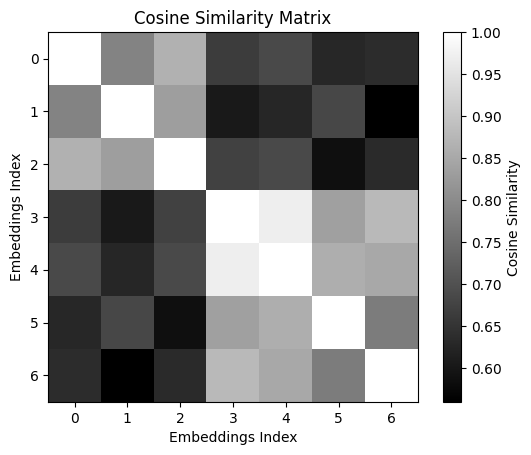

In [9]:
from utils.similarity import *
import numpy as np

concat = np.concatenate([dense1, dense2], axis=0)
matrix = cosine_similarity_matrix(concat)
plot_similarity_matrix(matrix, cmap='gray')